Celem mojego projektu jest analiza zbioru Heart Disease pod wzgledem brakujących danych, uzupełnienie ich oraz nauka maszynowa nego zboiru do rozpoznawania czy dany pacjent cierpi na chorobę serca. Zbiór Heart Disease jest to zbiór pobrany ze strony https://archive.ics.uci.edu/dataset/45/heart+disease z kategorii Health and Medicine. Jest on złożony z 13 atrybutów (podstawowa wersja posiada 76) oraz 303 przypadków (pacjentów). Zbiór posaida brakujące dane. Poniżej przedstawię opis poszczególnych cech zbioru.

**age**: Wiek osoby w latach
**sex**: płeć osoby (1 = mężczyzna, 0 = kobieta)
**cp**: typ bólu w klatce piersiowej
- Wartość 0: bezobjawowy
- Wartość 1: nietypowa dławica piersiowa
- Wartość 2: ból inny niż dławicowy
- Wartość 3: typowa dławica piersiowa

**trestbps**: Spoczynkowe ciśnienie krwi danej osoby (mm Hg przy przyjęciu do szpitala).

**chol**: pomiar cholesterolu u danej osoby w mg/dl

**fbs**: poziom cukru we krwi na czczo (> 120 mg/dl, 1 = prawda; 0 = fałsz)

**restecg**: spoczynkowe wyniki elektrokardiograficzne
- Wartość 0: wykazuje prawdopodobny lub definitywny przerost lewej komory według kryteriów Estesa.
- Wartość 1: prawidłowy
- Wartość 2: nieprawidłowości załamka ST-T (odwrócenie załamka T i/lub uniesienie lub obniżenie odcinka ST o > 0,05 mV)

**thalach**: Maksymalne osiągnięte tętno danej osoby

**exang**: Dławica piersiowa wywołana wysiłkiem (1 = tak; 0 = nie)

**oldpeak**: obniżenie odcinka ST wywołane wysiłkiem w stosunku do spoczynku ("ST" odnosi się do pozycji na wykresie EKG. Więcej informacji tutaj)

**slope**: nachylenie szczytowego wysiłkowego odcinka ST - 0: nachylenie w dół; 1: płaskie; 2: nachylenie w górę 0: nachylenie w dół; 1: płaskie; 2: nachylenie w górę
ca: Liczba głównych naczyń (0-3)

**thal** Zaburzenie krwi zwane talasemią Wartość 0: NULL (wcześniej usunięte ze zbioru danych)
Wartość 1: stała wada (brak przepływu krwi w pewnej części serca)
Wartość 2: normalny przepływ krwi
Wartość 3: wada odwracalna (zaobserwowano przepływ krwi, ale nie jest on normalny)

**num**: choroba serca (1 = nie, 0 = tak)

### Czyszczenie zbioru danych

Moją zanalizę zacznę od załadowania danych oraz sprawdzenia jak wiele danych brakuje.

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [40]:
#Załadowanie danych
data = pd.read_csv('processed.hungarian.csv')

In [41]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [42]:
len(data)

294

Za pomocą funkcji widzimy len() widzimy, że danych jest mniej niż w posiadanym przeze mnie pliku. Teraz za pomocą tak zwanej HeatMapy sprawdzimy jak przedstawia się zbiór ze względu na brakujące wartości.

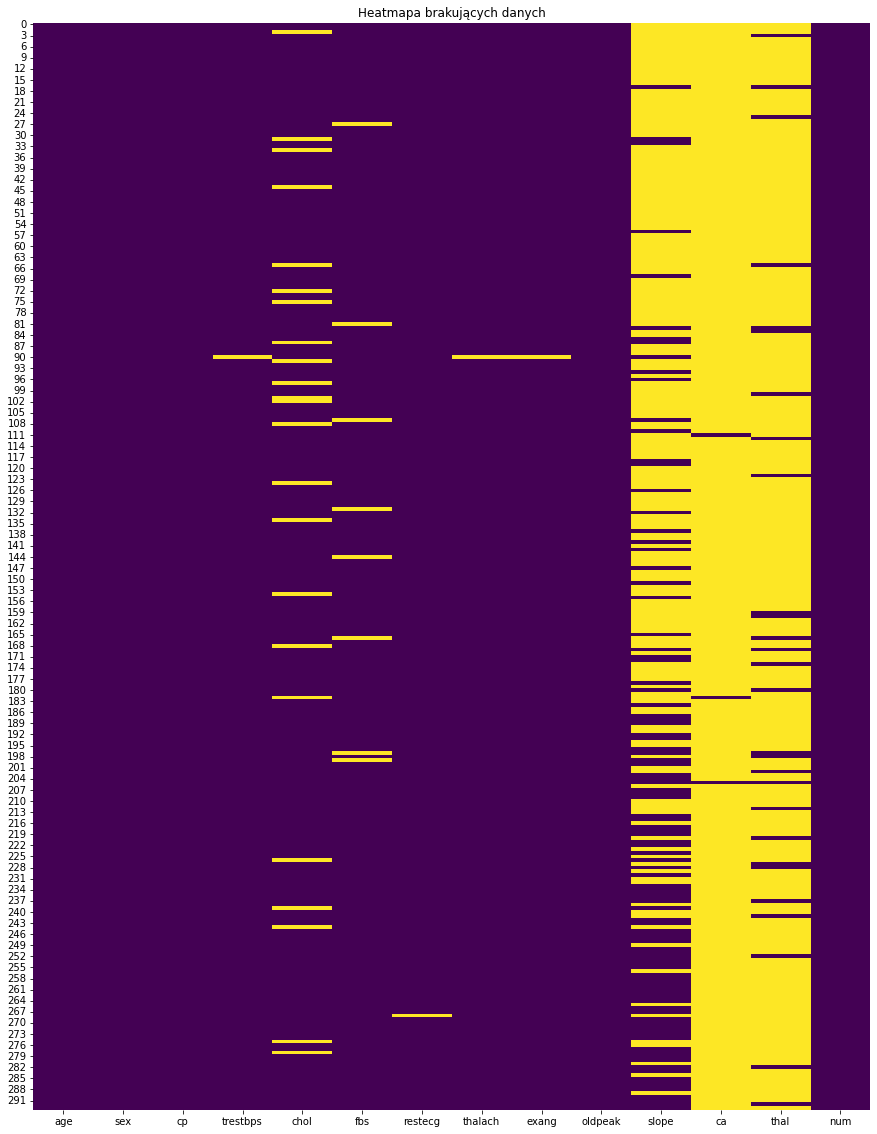

In [43]:
plt.figure(figsize=(15, 20))
sns.heatmap(data == '?', cmap='viridis', cbar=False)
plt.title('Heatmapa brakujących danych')
plt.show()

Jak widziy na HeatMapie atrybuty slope, ca oraz thal posiadają ogromne ilości brakujących danych, zatem pozbędziemy się tych atrybutów z naszego zbioru. Pozostałe atrybuty posaidają brakujące dane ale w małych ilościach. W tym przypadku możemy zrobić dwie rzeczy, zastępujemy te wartości średnimi albo pozbywamy się tych danych z naszego zbioru. Warto wziąc pod uwagę przy zastępowaniu danych czy dany atrybut jest kategoryczny czy liczbowy.

In [44]:
numer_wiersza = data.index[data['trestbps'] == '?'].tolist()
print(len(numer_wiersza))
numer_wiersza2 = data.index[data['chol'] == '?'].tolist()
print(len(numer_wiersza2))
numer_wiersza3 = data.index[data['fbs'] == '?'].tolist()
print(len(numer_wiersza3))
numer_wiersza4 = data.index[data['restecg'] == '?'].tolist()
print(len(numer_wiersza4))
numer_wiersza5 = data.index[data['thalach'] == '?'].tolist()
print(len(numer_wiersza5))
numer_wiersza6 = data.index[data['exang'] == '?'].tolist()
print(len(numer_wiersza6))

1
23
8
1
1
1


Widzimy, że wartości trestbps, restecg, thalach oraz exang brakuje tylko jeden raz, zatem usuniemy te wiersze. Atrybut **fbs** jest kategoryczny (0 lub 1) zatem postanawiam rownież usunąć brakujące wiersze.

In [45]:
print(numer_wiersza)
print(numer_wiersza4)
print(numer_wiersza5)
print(numer_wiersza6)
print(numer_wiersza3)

[90]
[268]
[90]
[90]
[27, 81, 107, 131, 144, 166, 197, 199]


In [46]:
data = data.drop(numer_wiersza)
data = data.drop(numer_wiersza4)
data = data.drop(numer_wiersza3)

In [47]:
len(data)

284

Brakujące dane w atrybucie **chol** zastąpimy średnią wartością.

In [48]:
numer_wiersza2 = data.index[data['chol'] == '?'].tolist()
numer_wiersza2

[2,
 31,
 34,
 44,
 65,
 72,
 75,
 86,
 91,
 97,
 101,
 102,
 108,
 124,
 134,
 154,
 168,
 182,
 226,
 239,
 244,
 275,
 278]

In [49]:
chol = data['chol']
chol = chol.drop(numer_wiersza2)
chol_mean = chol.astype(float).mean()
chol_mean = chol_mean.round(0)
chol_mean = chol_mean.astype(int)
print(chol_mean)

249


In [50]:
data['chol'].replace({'?': chol_mean}, inplace = True)
data['chol'] 


0      132
1      243
2      249
3      237
4      219
      ... 
289    331
290    294
291    342
292    393
293    275
Name: chol, Length: 284, dtype: object

In [51]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,249,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


Następnie usunę kolumny **slope**, **ca** oraz **thal** z powodu potęznego braku danych.

In [52]:
df = data.drop(['slope','ca','thal'], axis=1)

In [53]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,249,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,1
290,54,0,3,130,294,0,1,100,1,0.0,1
291,56,1,4,155,342,1,0,150,1,3.0,1
292,58,0,2,180,393,0,0,110,1,1.0,1


Po uzupełnieniu i oczyszczeniu danych dostałem zbiór złożony z 11 atrybutów z czego ostatni będzie tym, który będziemy chcieli przewidywać na podstawie dziesięciu poprzednich, oraz 284 przypadków.

Teraz przedstawię macierz korelacji cech. Aby skorzystać z funkcji .corr() najpierw musimy ustawić typ danych kategorycznych na inny. W moim przypadku będzie to int64. Cecha **oldpeak** jest typu float i taką ją zostawię. Możnaby również skorzystać z korelacji Pearsona dla atrybutów kategorycznych.

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [55]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps     object
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeak     float64
num           int64
dtype: object

In [56]:
df[['trestbps','chol','fbs','restecg','thalach','exang']] = df[['trestbps','chol','fbs','restecg','thalach','exang']].astype('int64')

In [57]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
num           int64
dtype: object

In [58]:
correlation_matrix = df.corr()

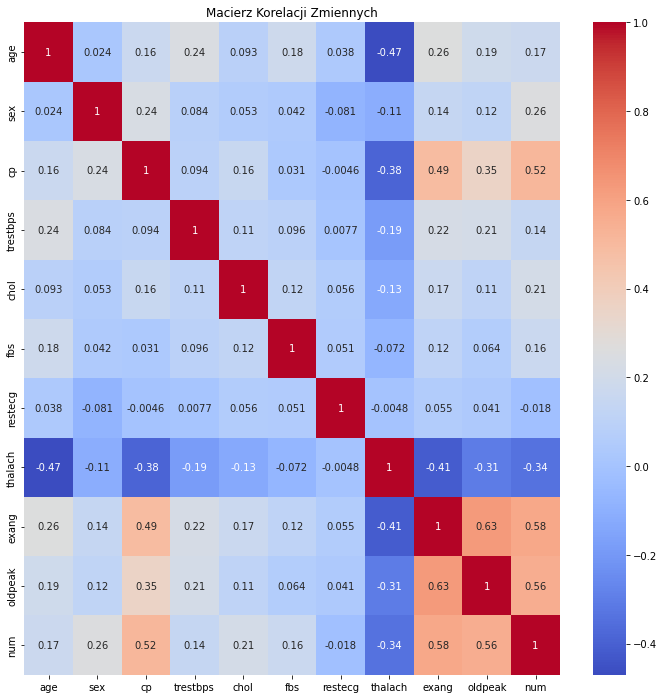

In [59]:
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Macierz Korelacji Zmiennych')
plt.show()

Zanim przejdę do procesu uczenia, przedstawię podstawowe klasyfikatory:

**LogisticRegression** - służy do implementacji regresji logistycznej, która jest jednym z algorytmów klasyfikacji binarnej. Regresja logistyczna jest stosowana, gdy zmienna zależna jest binarna, czyli może przyjmować tylko dwie wartości (0 lub 1).

**LinearDiscriminantAnalysis** - (LDA) to technika analizy dyskryminacyjnej, która jest często używana w kontekście klasyfikacji wieloklasowej. Jest to algorytm uczenia maszynowego, który służy do projektowania przestrzeni cech, maksymalizując różnice między klasami i minimalizując rozrzut wewnątrz klas.

**KNeighborsClassifier** -  algorytm klasyfikacji k-najbliższych sąsiadów (K-Nearest Neighbors, KNN). Jest to prosty algorytm klasyfikacji, który przypisuje nowe próbki do klasy na podstawie większości głosów k najbliższych sąsiadów.

**DecisionTreeClassifier** -  to algorytm klasyfikacji drzewa decyzyjnego. Drzewo decyzyjne to struktura drzewa, w której każdy wierzchołek reprezentuje decyzję dotyczącą pewnej cechy, a każda krawędź prowadzi do kolejnego wierzchołka, aż do osiągnięcia liścia, który reprezentuje przewidywaną klasę.

**GaussianNB** - to klasa implementująca algorytm klasyfikatora Naive Bayes dla danych, których rozkład można przyjąć jako gaussowski (normalny). Algorytm Naive Bayes jest oparty na twierdzeniu bayesowskim i zakłada niezależność między cechami, co prowadzi do uproszczenia obliczeń.

**SVM (SVC)** - SVM to rodzina algorytmów uczenia maszynowego, stosowanych zarówno w zadaniach klasyfikacji, jak i regresji. Algorytm SVM szuka hiperpłaszczyzny w przestrzeni cech, która najlepiej dzieli dane na różne klasy. W przypadku klasyfikacji binarnej, SVM stara się znaleźć hiperpłaszczyznę o największym marginesie, czyli największej odległości między najbliższymi przykładami z różnych klas. W scikit-learn, moduł sklearn.svm zawiera implementacje SVM, w tym SVC (Support Vector Classification) do klasyfikacji.

Zaczynamy od załadowania potrzebnych bibliotek oraz modułów

In [60]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score, confusion_matrix, accuracy_score
from sklearn import datasets

Wybieramy teraz cechę, którą będziemy przewidywać oraz zbiór uczący.

In [61]:
X = df.values[:,:10]
y = df.values[:,10]

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=True)

In [63]:
len(X_train), len(X_test)

(227, 57)

Na sam początek zastosuję klasyfikator LeogisticRegression. Model ma przewidywać, czy pacjent jest zdrowy lub chory, zatem jest to problem binanry.

In [64]:
model=LogisticRegression(max_iter=1000)

In [65]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [66]:
Y_pred = model.predict(X_test)
print(Y_pred)
print(Y_test)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1.]
[1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1.]


In [67]:

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)*100
print("Dokładność modelu jest na poziomie {:.2f}%".format(accuracy))


Dokładność modelu jest na poziomie 89.47%


Widzimy, że wynik jest nienajgorszy i wynosi 89,47%. 

In [68]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)

Poniżej prezentuję macierz pomyłek.

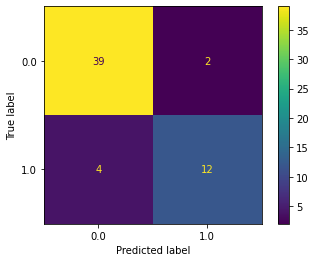

In [69]:

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()


Powyższa macierz mówi nam o tym jak w porównaniu do danych testowych model przewidział dobry wynik. Widzimy, że model przewidział:
39 razy poprawnie, że pacjent jest zdrowy
12 razy poprawnie, że pacjent jest chory
2 razy model osobę zdrową sklasyfikował jako chorą
4 razy model osobę chorą sklasyfikował jako zdrową

Teraz przejdziemy przez wszystkie klasyfikatory za pomocą walidacji krzyżowej K-fold. 
W tej metodzie zbiór danych dzielony jest na K równych podzbiorów (zwanych "k-foldami"). Najczęściej K=10. 
Następnie K-1 (czyli 9) podzbiorów jest używanych do treningu klasyfikatora, a jeden podzbiór dowalidacji. Proces uczenia i walidacji powtarzany jest K (10) razy, za każdym razem wykorzystując inny podzbiór jako zbiór walidacyjny. Wyniki są uśredniane, co pozwala na bardziej stabilne oszacowanie wydajności klasyfikatora.

In [70]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', max_iter=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))


In [71]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %.3f (%.4f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.833 (0.0718)
LDA: 0.824 (0.0526)
KNN: 0.657 (0.0687)
DT: 0.688 (0.0839)
NB: 0.811 (0.0742)
SVM: 0.617 (0.0127)


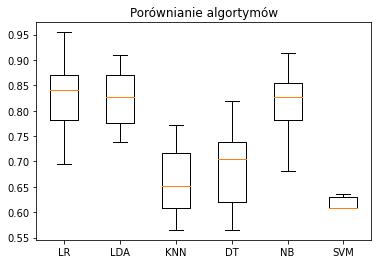

In [72]:
plt.boxplot(results, labels=names)
plt.title('Porównianie algortymów')
plt.show()

Jak możemy zauważyć na wykresie pudełkowym, najlepsze wyniki uzyskał model regresji liniowej. Drugi z koleji był model LinearDiscriminantAnalysis a trzeci GaussianNB.

Teraz zobrazuję jak przedstawia się model drzewa decyzyjnego. Jest to o tyle ciekawe, ponieważ zobaczymy w jaki sposób model będzie dzielić węzły na krawędzie.

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [74]:
feature = df.columns
feature = feature.delete(10)
print(feature)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak'],
      dtype='object')


In [75]:
print(tree.export_text(model, feature_names=feature))


|--- oldpeak <= 0.90
|   |--- cp <= 3.50
|   |   |--- chol <= 456.00
|   |   |   |--- thalach <= 95.00
|   |   |   |   |--- class: 1.0
|   |   |   |--- thalach >  95.00
|   |   |   |   |--- cp <= 1.50
|   |   |   |   |   |--- sex <= 0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- sex >  0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- cp >  1.50
|   |   |   |   |   |--- age <= 57.50
|   |   |   |   |   |   |--- exang <= 0.50
|   |   |   |   |   |   |   |--- trestbps <= 117.50
|   |   |   |   |   |   |   |   |--- trestbps <= 112.50
|   |   |   |   |   |   |   |   |   |--- age <= 37.00
|   |   |   |   |   |   |   |   |   |   |--- age <= 33.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- age >  33.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- age >  37.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   

In [76]:
print("Dokładność modelu jest na poziomie {:.2f}%".format(accuracy_score(Y_test, Y_pred)*100))

Dokładność modelu jest na poziomie 89.47%


Dokładność modelu pozostawia sporo do życzenia, 72% to bardzo słaby wynik i nie nadaje się on do uwzględnienia.
Drzewo decyzyjne w tym przypadku jest średnim wyborem, ponieważ osoby cierpiące na chore serce, kilka z tych cech nie muszą mieć powyżej lub poniżej normy, a drzewo właśnie tak zakłada.

# Winoski

Celem projektu było stworzenie najlepszego modelu klasyfikacji do załączonych danych. Klasyfikacja na podstawie danych oraz wybór modelu jest bardzo złożonym etapem jeśli chcemy to zrobić bardzo dokładnie. Każdy z klasyfikatorów jest odrębnym teamtem, w ktorym znajduje się bardzo dużo parametrów do edycji, które znacząco lub mniej wpływają na dokładność klasyfikacji modelu. Najlepszy wynik dla moich przeze mnie oczyszczonych danych uzyskałem dla modelu LogisticRegression, który wyniósł 89%. Projekt ten jak i cały przedmiot bardzo przybliżył mi wiedzę na temat klasyfikacji w bibliotece ScikitLearn. 